<a href="https://colab.research.google.com/github/tmegandoan/assignment4/blob/main/ttd6as_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [1]:
! git clone https://www.github.com/DS3001/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 4.83 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

### 1.1 load and cleaning the data - finish this

In [3]:
cars = pd.read_csv('/content/assignment4/data/cars_hw.csv')

In [ ]:
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
# checking column types
print(cars.dtypes)

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


looks like most of the variables that we want are pretty clean aside from Make_Year, so we will need to clean this column

<Axes: >

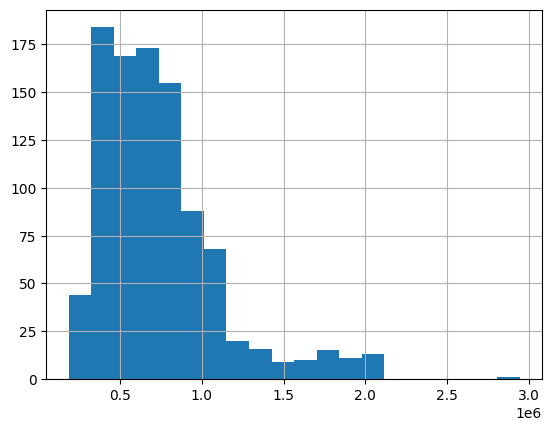

In [5]:
cars['Price'].hist(bins=20) # histogram shows that the prices are skewed to the right

In [6]:
## making the following columns a factor: Make_type
cars['Make_Year'] = cars['Make_Year'].astype('category')

## removing any characters in the No_of_Owners column:
cars['No_of_Owners'] = cars['No_of_Owners'].str.replace(r'\D', '', regex=True).astype(int)

# removing the unnamed column as we do not need this
cars = cars.drop(cars.columns[0], axis = 1)

In [7]:
y = cars['Price']
X = cars.drop('Price',axis=1)

Axes(0.125,0.11;0.775x0.77)


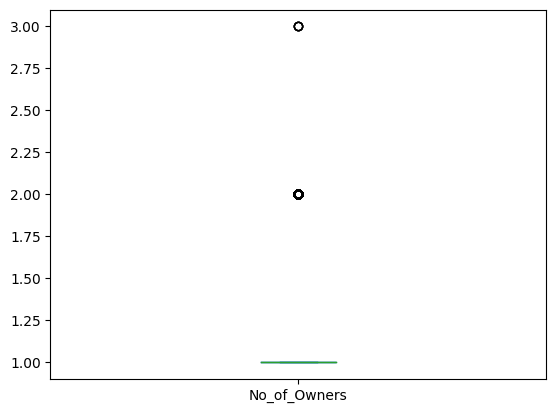

In [8]:
# Check for outliers:

# number of owners
print(X['No_of_Owners'].plot.box()) # some outliers so we will have to windsorize


Axes(0.125,0.11;0.775x0.77)


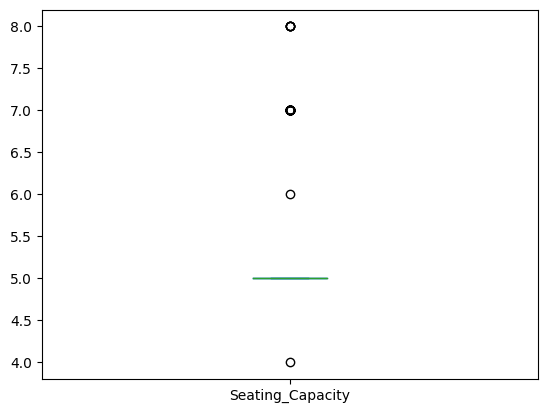

In [9]:
print(X['Seating_Capacity'].plot.box()) # some outliers so we will have to windsorize


Axes(0.125,0.11;0.775x0.77)


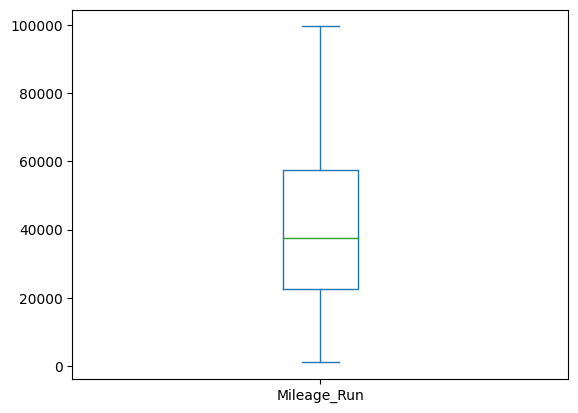

In [10]:
# mileage run
print(X['Mileage_Run'].plot.box()) ## no apparant outliers

In [11]:
## windsorizing the outliers:

def windsorize(x):
      # Convert to a NumPy array
    x = np.array(x)
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

In [15]:
X['No_of_Owners'] = X['No_of_Owners'].apply(windsorize) # getting rid of outliers for this column

In [16]:
X['Seating_Capacity'] = X['Seating_Capacity'].apply(windsorize) # getting rid of these outliers

In [17]:
X.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual


In [18]:
## checking the categorical variables to make sure that there are no misspellings in the group names that we need to fix:
print(X['Make'].value_counts())
print('----------------------------')

print(X['Color'].value_counts())
print('----------------------------')

print(X['Body_Type'].value_counts())
print('----------------------------')

print(X['Fuel_Type'].value_counts())
print('----------------------------')

print(X['Transmission'].value_counts())
print('----------------------------')

print(X['Transmission_Type'].value_counts())
print('----------------------------')

Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: Make, dtype: int64
----------------------------
white     200
red       187
grey      164
silver    132
blue      128
brown      70
black      35
orange     19
bronze     12
beige       9
yellow      6
purple      6
golden      3
maroon      3
green       2
Name: Color, dtype: int64
----------------------------
hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: Body_Type, dtype: int64
----------------------------
petrol        783
diesel        191
petrol+cng      2
Name: Fuel_Type, dtype: int64
----------------------------
5-Speed    749
6-Speed    169
4-Speed     39
7-Speed     16
CVT          3
Name: Transmi

looks like all of the categorical variables are clean. We then look deeper at our quantitative variables. The quantitative variables that we will be looking at are Mileage_Run, No_of_Owners and Seating_Capacity

<Axes: >

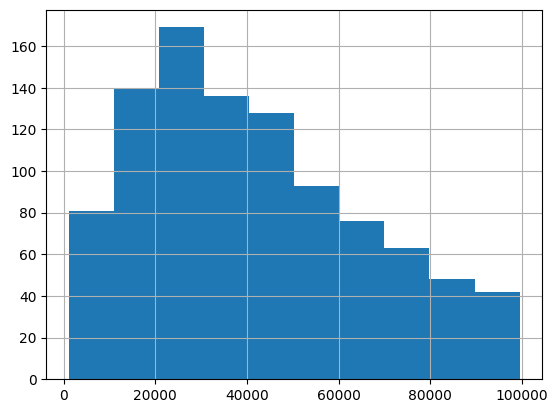

In [19]:
## Examining Mileage_run
X['Mileage_Run'].hist()

# this histogram is slightly skewed, and we do not need to transform this variable

<Axes: >

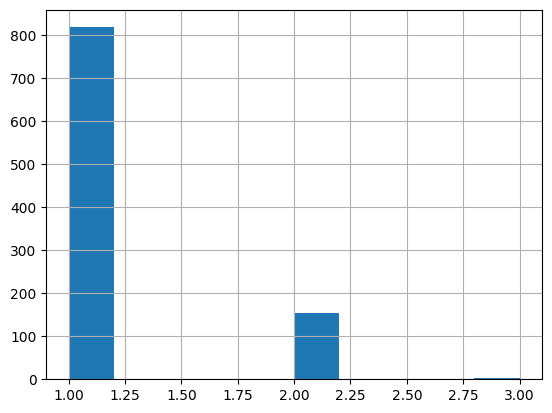

In [20]:
## No_of_Owners
X['No_of_Owners'].hist()

# this histogram really does not tell us anything, so we will be scaling this variable using log(x). We dont have any 0s or negatives in this column, log(x) will work

<Axes: >

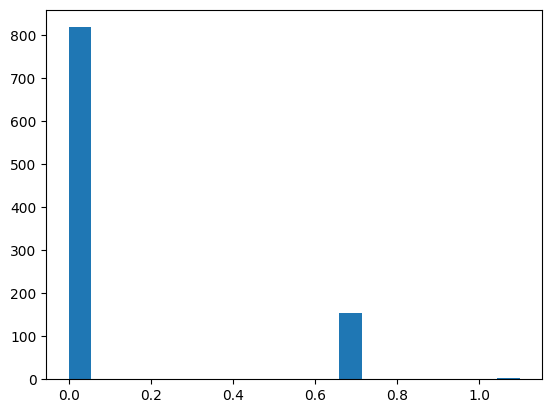

In [21]:
X['owners_log'] = np.log(cars['No_of_Owners'])
X['owners_log'].hist(bins=20,grid=False)

<Axes: >

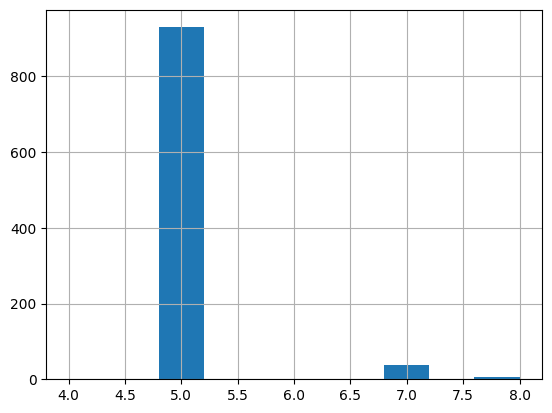

In [22]:
## Examining seating_capacity
X['Seating_Capacity'].hist()

# this histogram really does not tell us anything, so we will be scaling this variable using log(x). We dont have any 0s or negatives in this column, log(x) will work

<Axes: >

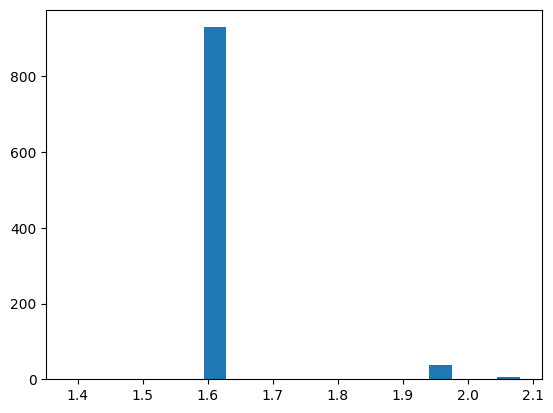

In [23]:
X['seatcap_log'] = np.log(cars['Seating_Capacity'])
X['seatcap_log'].hist(bins=20,grid=False)

In [24]:
X.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,owners_log,seatcap_log
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,0.000000,1.609438
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,0.000000,1.609438
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,0.693147,1.609438
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,0.000000,1.609438
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,0.000000,1.609438


In [25]:
## removing the previous seating capacity and No_of_Owners column because we have new transformed columns
dropcol = ['Seating_Capacity', 'No_of_Owners']
X = X.drop(columns=dropcol, axis=1)

### 1.2 Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


<Axes: ylabel='Density'>

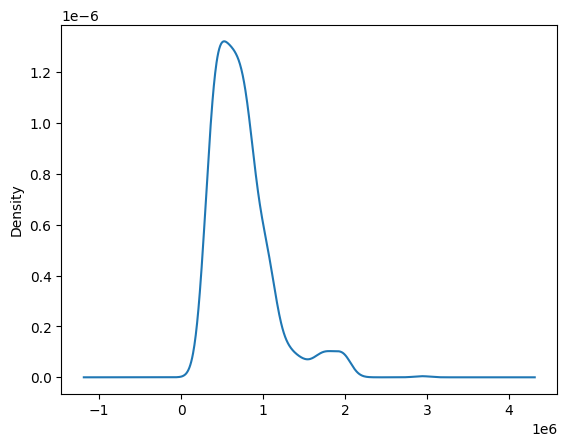

In [26]:
# summary of Price
print(cars['Price'].describe())

# kernel density plot of price:
cars['Price'].plot.density() # The kernel density plot for age

In [27]:
# summary statistics by make
cars['Price'].groupby(cars['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


In [28]:
# Calculate the average Price by Make
average_price_by_make = cars.groupby('Make')['Price'].mean()

pd.options.display.float_format = '{:.2f}'.format

# Print the result
print(average_price_by_make)

Make
Chevrolet        453500.00
Datsun           289666.67
Ford             721173.08
Honda            798972.60
Hyundai          691891.80
Jeep            1499500.00
Kia             1614750.00
MG Motors       1869457.14
Mahindra        1100166.67
Maruti Suzuki    588784.98
Nissan           884250.00
Renault          662573.53
Skoda           1136000.00
Tata            1055217.39
Toyota           800340.00
Volkswagen       605827.59
Name: Price, dtype: float64


<Axes: ylabel='Density'>

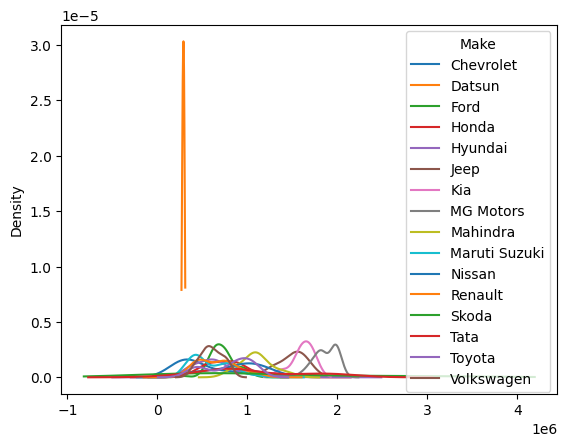

In [29]:
# kernel density plot by make and model:
group_by = 'Make'
var = 'Price'
df_wide = cars.pivot(columns=group_by,values=var)
df_wide.plot.density()

According to our summary statistics, it looks like the most expensive car on average are from the MG Motors. There are a few brands that produce cars that are priced on average above 1 million, but most car brands also provide more affordable options as well that are below 1 million and range in price. The cheapest car that you can get is by the brand Datsun.

### 1.3 split the data into test and train

In [32]:
## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

### 1.4  Let's focus on linear models.
Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the test set?

 Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much

In [33]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,Fuel_Type,Transmission,Transmission_Type,owners_log,seatcap_log
448,Hyundai,2015,red,hatchback,40959,petrol,5-Speed,Manual,0.00,1.61
213,Hyundai,2014,white,sedan,72801,petrol,5-Speed,Manual,0.00,1.61
146,Ford,2019,red,hatchback,14499,diesel,5-Speed,Manual,0.00,1.61
713,Ford,2019,white,suv,60197,petrol,6-Speed,Automatic,0.00,1.61
421,Maruti Suzuki,2012,blue,hatchback,40411,petrol,5-Speed,Manual,0.00,1.61


In [34]:
# removing any categorical variables in x train and x test:
dropcol = ['Make', 'Make_Year', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_numtest = X_test.drop(columns=dropcol, axis=1)
X_numtrain = X_train.drop(columns=dropcol, axis=1)

In [ ]:
X_numtrain.head()

,Mileage_Run,owners_log,seatcap_log
448,40959,0.00,1.61
213,72801,0.00,1.61
146,14499,0.00,1.61
713,60197,0.00,1.61
421,40411,0.00,1.61


In [35]:
def pn(x):
    print(x,'\n')

In [36]:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression().fit(X_numtrain, y_train) # Fit the linear model

pn(reg.intercept_) # Intercept value
pn(reg.coef_) # Regression coefficients
pn(reg.score(X_numtrain, y_train)) # R squared measure

126878.82594734302 

[-2.18055115e+00 -2.09264832e+05  4.46049132e+05] 

0.0590231824090548 



In [37]:
# Predicted values:
y_hat_lm = reg.predict(X_numtest)
residuals_lm = y_test - y_hat_lm

R^2 and RMSE on Test set of just numerical variables:

R^2: 0.0590231824090548


In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [43]:
# Categorical Variables with One-Hot Encoding Model
categorical_vars = ['Make', 'Make_Year', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_traincat = X_train[categorical_vars]
X_testcat = X_test[categorical_vars]

encoder = OneHotEncoder(sparse=False, drop='first')
Xtrain_encoded = encoder.fit_transform(X_traincat)
Xtest_encoded = encoder.transform(X_testcat)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
model = LinearRegression()
model.fit(Xtrain_encoded, y_train)
r2_cat = model.score(Xtest_encoded, y_test)
y_pred_cat = model.predict(Xtest_encoded)
rmse_cat = np.sqrt(np.mean((y_pred_cat - y_test) ** 2))
print("R2:", r2_cat)
print("RMSE:", rmse_cat)

R2: 0.729378072151925
RMSE: 193470.59659108112


The R2 value for the categorical variable encoded model is much better. The RSME is also lower. we will continue to make the combined model

In [45]:
X_combined_train = np.concatenate((X_numtrain, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_numtest, Xtest_encoded), axis=1)

In [46]:
model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)

R2: 0.7430864654302525
RMSE: 188506.77831428335


The combined model produces the highest R2 value of 0.7430864654302525, therefore the third model with both the numerical and categorical variables most accurately predicts the Price variable

### 1.5 Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables.

As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 3?

In [47]:
# Expanding the numerical variables with degree 3

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z_train = expander.fit_transform(X_numtrain) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

Z_test = expander.fit_transform(X_numtest) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

In [48]:
# Categorical Variables with One-Hot Encoding Model
categorical_vars = ['Make', 'Make_Year', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_traincat = X_train[categorical_vars]
X_testcat = X_test[categorical_vars]

encoder = OneHotEncoder(sparse=False, drop='first')
Xtrain_encoded = encoder.fit_transform(X_traincat)
Xtest_encoded = encoder.transform(X_testcat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
X_combined_train = np.concatenate((X_train_lm, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_test_lm, Xtest_encoded), axis=1)

In [50]:
model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)

R2: 0.6665466743435084
RMSE: 214758.81833062955


In [51]:
# Expand features with degree 5
expander = PolynomialFeatures(degree=5,include_bias=False) # Create the expander
Z_train = expander.fit_transform(X_numtrain) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

Z_test = expander.fit_transform(X_numtest) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# combine datasets
X_combined_train = np.concatenate((X_train_lm, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_test_lm, Xtest_encoded), axis=1)

# run new model
model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)

R2: 0.025640247380056103
RMSE: 367107.40711167833


In [52]:
# Expand features with degree 1
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
Z_train = expander.fit_transform(X_numtrain) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

Z_test = expander.fit_transform(X_numtest) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# combine datasets
X_combined_train = np.concatenate((X_train_lm, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_test_lm, Xtest_encoded), axis=1)

# run new model
model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)

R2: 0.7430864654302525
RMSE: 188506.77831428335


In [53]:
for i in range(1,10):
  # Expand features with degree i
  expander = PolynomialFeatures(degree=i,include_bias=False) # Create the expander
  Z_train = expander.fit_transform(X_numtrain) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

  Z_test = expander.fit_transform(X_numtest) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

  # combine datasets
  X_combined_train = np.concatenate((X_train_lm, Xtrain_encoded), axis=1)
  X_combined_test = np.concatenate((X_test_lm, Xtest_encoded), axis=1)

  # run new model
  model_combined = LinearRegression()
  model_combined.fit(X_combined_train, y_train)
  r2_combined = model_combined.score(X_combined_test, y_test)
  y_pred_combined = model_combined.predict(X_combined_test)
  rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
  print("R2:", r2_combined)
  print("RMSE:", rmse_combined)
  print('-----------------------')

R2: 0.7430864654302525
RMSE: 188506.77831428335
-----------------------
R2: 0.7401140665559627
RMSE: 189594.12074681857
-----------------------
R2: 0.6665466743435084
RMSE: 214758.81833062955
-----------------------
R2: 0.01813636306233435
RMSE: 368518.3069595352
-----------------------
R2: 0.025640247380056103
RMSE: 367107.40711167833
-----------------------
R2: -0.034841368181009136
RMSE: 378329.6423339519
-----------------------
R2: -0.09267281953922302
RMSE: 388757.29276719125
-----------------------
R2: -0.04097908325782296
RMSE: 379449.9331779212
-----------------------
R2: -0.36103020443015454
RMSE: 433877.7314418969
-----------------------


As the degree increases, the R2 starts to decrease and the RSME increases. The R2 is a little better than our previous models

### 1.6 For your best model so far, determine the predicted values for the test data and plot them against the true values.

Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model

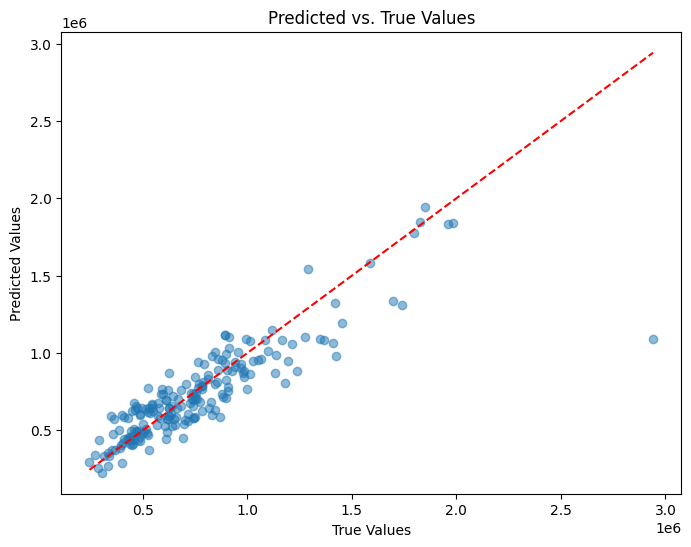

In [55]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_combined, alpha=0.5)
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a 45-degree line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()

when comparing the true values to the predicted values, it does appear that the points line up with the red dotted line indicating that the model is pretty good.

<ipython-input-56-83b88d2c2c9b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(res, shade=True)


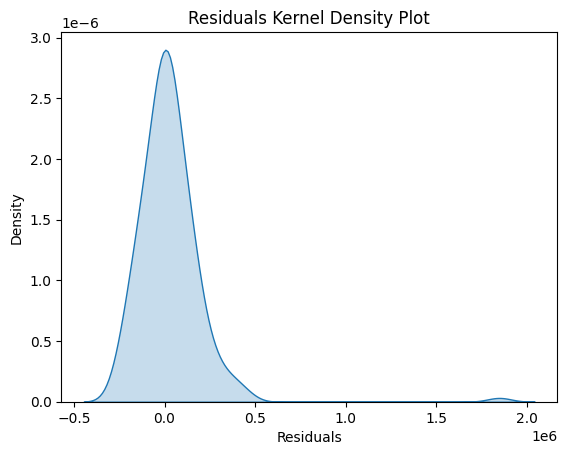

In [56]:
# residuals:
res = y_test - y_pred_combined

sns.kdeplot(res, shade=True)
plt.title("Residuals Kernel Density Plot")
plt.xlabel("Residuals")

# Show the plot
plt.show()


the bell curve appears to be centered above 0 and it seems to be bell shaped.

### 1.7 Now, let's use a regression tree.

Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the R2 and RMSE on the test set of a variety of depths. What depth tree gives the best results?

In [57]:
X_traincode= pd.get_dummies(X_train, drop_first=True)
X_testcode = pd.get_dummies(X_test, drop_first=True)

In [58]:
X_testcode.head()

,Mileage_Run,owners_log,seatcap_log,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,...,Color_yellow,Body_Type_hatchback,Body_Type_muv,Body_Type_sedan,Body_Type_suv,Fuel_Type_petrol,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_Type_Manual
956,57046,0.00,1.61,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
940,7339,0.00,1.61,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
479,11275,0.00,1.61,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
788,32454,0.00,1.61,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
768,6738,0.00,1.61,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1


In [59]:
# Check for missing columns in the test set
misscol = set(X_traincode.columns) - set(X_testcode.columns)

# Create missing dummy columns in the test set and set values to 0
for col in misscol:
    X_testcode[col] = 0

X_testcode = X_testcode[X_traincode.columns]


In [60]:
## Decision Trees sample code:
from sklearn import tree

for i in range(1,10):
  D = i
  model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
  cart = model.fit(X_traincode, y_train)

  ## Make Predictions on the Test Set
  y_hat_cart = cart.predict(X_testcode)
  residuals_cart = y_test - y_hat_cart

  ## Metrics:
  SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
  MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
  RMSE_cart = (SSE_cart/N_test)**(1/2)
  R2_cart = 1 - SSE_cart/TSS

  print(D)
  print('R2:', R2_cart)
  print('SSE:', SSE_cart)
  print('----------------')

1
R2: 0.7117656134410351
SSE: 7858053005258.348
----------------
2
R2: 0.7162838322646445
SSE: 7734874076369.459
----------------
3
R2: 0.712231104637544
SSE: 7845362449702.792
----------------
4
R2: 0.7195846076585437
SSE: 7644885965258.348
----------------
5
R2: 0.7205301642889096
SSE: 7619107520813.902
----------------
6
R2: 0.7265330067513848
SSE: 7455453715258.348
----------------
7
R2: 0.7248934437676334
SSE: 7500152659702.792
----------------
8
R2: 0.7176734650103824
SSE: 7696988909702.792
----------------
9
R2: 0.7230734365236372
SSE: 7549771005258.348
----------------


The depth tree that gives the best results is depth of 5 that produces an R2 value of 0.7272044935442369

### 1.8 For your best tree, determine the predicted values for the test data, and plot them against the true values.

Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

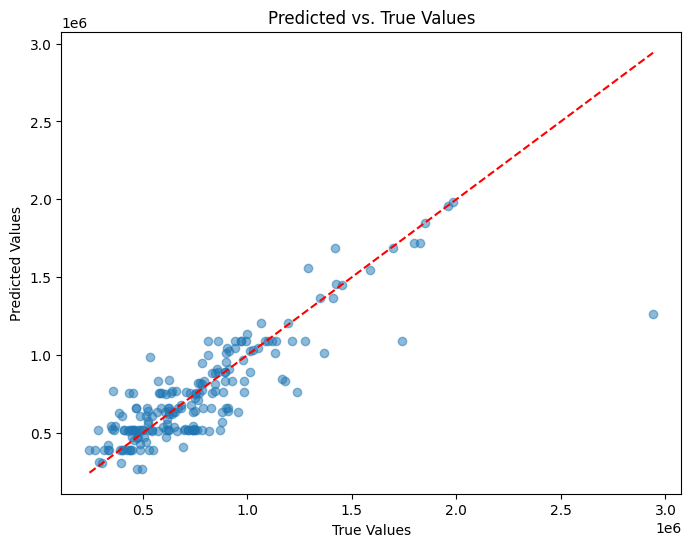

In [61]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat_cart, alpha=0.5)
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a 45-degree line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()

It appears that the dots line up well along the dashed red line

<ipython-input-62-757f6e9505f3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_cart, shade=True)


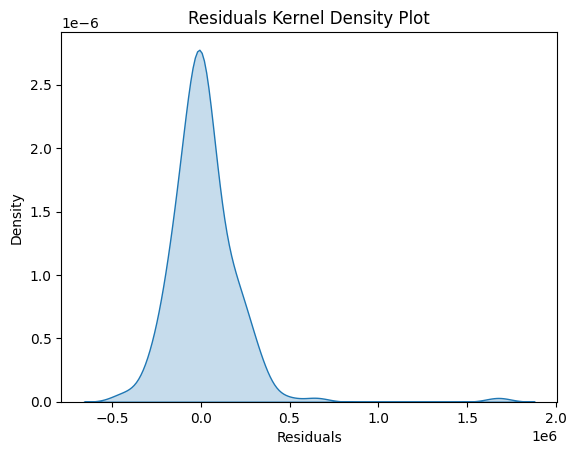

In [62]:
# residuals:
residuals_cart = y_test - y_hat_cart

sns.kdeplot(residuals_cart, shade=True)
plt.title("Residuals Kernel Density Plot")
plt.xlabel("Residuals")

# Show the plot
plt.show()


the residuals are somewhat centered around 0 and the distribution is bell shaped.

###1.9 Which model --- linear model or classification and regression tree --- has better performance on the test set?

The Tree method had a better performance on the test set according to our measures of R2 and RSME.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

### 3.1 Loading and crosstabulating

In [76]:
## load the data:
cont = pd.read_csv('/content/assignment4/data/contraception_hw.csv')
cont.head()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1


In [77]:
# regular tabulation:
cont['method'].value_counts()

# cross tabulation:
pd.crosstab(cont['method'], cont['numberChildren'])


numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


1 = No Contraception
3 = Short Term (e.g. condoms, birth control pills)
2 = Long Term (e.g. IUD, sterilization).

For our methods, 1 indicates no contraception usage, 2 represents long term contraceptive usage, and 3 represents short term contraceptive usage.
According to our cross tabulation, we can see that long term contraceptives like IUDs or sterilization are acutally not very common. We see that for couples that have 0-2 kids, they do not use contraception. For couples that have 3-5 kids, they use short term contraceptives like condoms. For couples that have more than 6 kids, majority of the time, these couples do not use contraceptives. From this perspective, we cannot say that couples who use birth control normally have more children than couples who do not. Although we hypothesize this based off of our cross tabulation, we will not be sure until we run tests


## Q3.2 Split the sample into ~80% training data and ~20% testing data.

In [78]:
y = cont['method']
print(y.describe())
X = cont.drop('method',axis=1)
X.head()

count   1473.00
mean       1.92
std        0.88
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        3.00
Name: method, dtype: float64


,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure
0,1,24,2,3,3,1,1,2,3,0
1,2,45,1,3,10,1,1,3,4,0
2,3,43,2,3,7,1,1,3,4,0
3,4,42,3,2,9,1,1,3,3,0
4,5,36,3,3,8,1,1,3,2,0


In [79]:
# coercing the method column to a factor
cont['method'] = cont['method'].astype('category')


In [80]:
## Test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### 3.3 We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

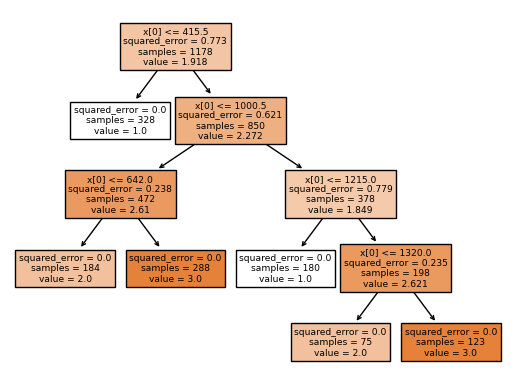

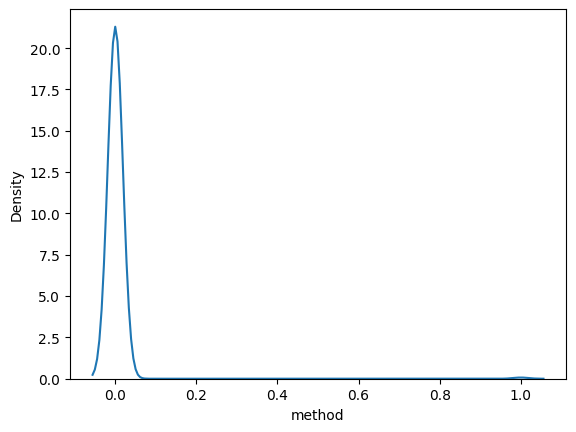

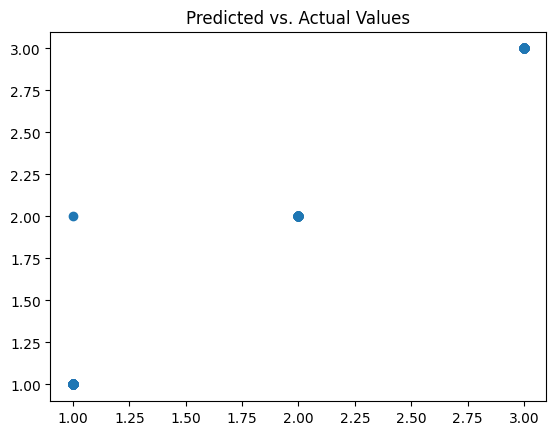

In [96]:
## Decision Trees sample code:
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

In [86]:
print('R2:',R2_cart)
print('MSE', MSE_cart)

R2: 0.9999999999999634
MSE 0.00510204081632653


we are trying to predict what type of contraceptive method people are using, but the nodes on the trees don't really make sense because it does not allude to all of the predicted methods from 1,2,3. This model results in a number/integer instead of showing which group the row will be in. The outputs just do not make sense in this context for predicting contraceptive method group.

### 3.4 Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?

In [98]:
def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})


{'confusion_matrix': col_0    1   2    3
row_0              
1      121   1    0
2        0  73    0
3        0   0  100, 'accuracy': 0.9948717948717949, 'specificity': 0.6033057851239669, 'sensitivity': 1.0, 'mcc': 0.989141310268265}


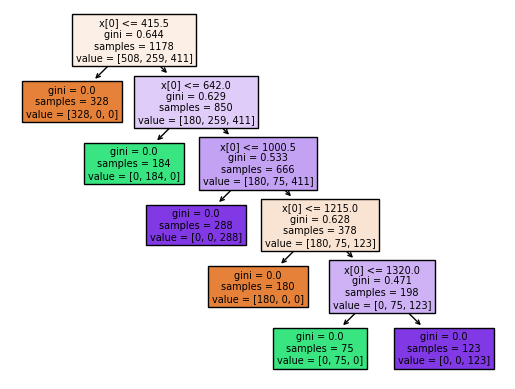

In [99]:
## Decision Trees sample code:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# Compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)


In [89]:
print('R2:',R2_cart)
print('MSE', MSE_cart)

R2: 0.9999999999999634
MSE 0.00510204081632653


With the classificaiton tree, we can see how the model groups the rows into the three contraceptive method classes where finally at the last two nodes it has shuffled everyone into either 2 or 3. The value = [] row lets us know where the model has shuffled the rows

### 3.5 Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a  3×3  matrix instead of  2×2 .). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

In [100]:
## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

In [101]:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.9948717948717949 



col_0,1,2,3
method,,,
1,121,0,0
2,1,73,0
3,0,0,100


### 3.6 Why can't you use a linear probability model to do this exercise?


Explain clearly in words.

we cannt use linear probability models like logistic regression to do this problem becuase we have more than 2 classes. there are three contraceptive methods we are trying to predict, and logistic regression results in binary outputs only.